<a href="https://colab.research.google.com/github/Herrera00/CIENCIA-DATOS-2025/blob/main/Clase_4_Medidas_de_tendencia_central_variabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AGENDA
1. Definir conceptos
2. Cargar detos desde drive
3. Calculo de la desviación estándar
4. Exploración de distribucion de datos (graficos)

###1. DEFINICIÓN DE CONCEPTOS
1.1 Varianza
R/:Es una medida que indica cuánto varían los datos respecto a la media.

1.2 Desviación estandar

R/:Es la raíz cuadrada de la varianza y mide la dispersión o cuánto se alejan los datos de la media en promedio.

1.3 Desviacion de la media absoluta

R/:Es el promedio de las diferencias absolutas entre cada dato y la media, mostrando cuánto se alejan los datos de la media sin considerar el signo.

1.4 Desviacion absoluta mediana de la mediana (MAD)

R/:Es la mediana de las diferencias absolutas entre cada dato y la mediana. Es una medida robusta de dispersión, menos sensible a valores extremos.

1.5 Rango

R/:Es la diferencia entre el valor máximo y el valor mínimo de un conjunto de datos, indicando la extensión total de los datos.

1.6 Estadistica ordinal

R/:Es un tipo de estadística para datos que tienen un orden o jerarquía, pero no una distancia numérica definida entre valores.

1.7 Percentil

R/:Es un valor que divide un conjunto de datos en 100 partes iguales.

1.8 Rango intercuartil (IQR)

R/:Es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) y representa la dispersión del 50% central de los datos, ignorando valores extremos.


In [16]:
!pip install wquantiles

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import trim_mean
from statsmodels import robust
import matplotlib.pyplot as plt
import wquantiles

In [18]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/state.csv")
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [19]:
data.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [20]:
mayor_poblacion =data.groupby(["Population"])["State"].max()
mayor_poblacion

,State
Population,
563626,Wyoming
625741,Vermont
672591,North Dakota
710231,Alaska
814180,South Dakota
897934,Delaware
989415,Montana
1052567,Rhode Island
1316470,New Hampshire


In [21]:
data.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [34]:
#Calculando la desviacion estandar y cuantiles (population)
data["Population"].std()

6848235.347401142

In [48]:
#Calculando la desviacion estandar (muerde rate)
data["Murder.Rate"].std()

1.915736124302923

In [24]:
#Calcular el IQR (population)
data.Population.quantile(0.75)-data.Population.quantile(0.25)

np.float64(4847308.0)

In [53]:
#Calcular IQR (murder rate)
data["Murder.Rate"].quantile(0.75)-data["Murder.Rate"].quantile(0.25)

np.float64(3.125)

In [26]:
#MAD (population)
robust.scale.mad(data["Population"])

np.float64(3849876.1459979336)

In [47]:
#Calcular el MAD de la tasa de asesinatos
robust.scale.mad(data["Murder.Rate"])

np.float64(2.3721635496089624)

##4. EXPLOTACION DE LA DISTRIBUCION DE DATOS
4.1 Diagrama de caja (poner definicion e indicar como se lee)

R/:

4.2 Diagrama de frecuencias

R/:

4.3 Histograma

R/:

4.4 Diagrama de densidad

R/:

In [29]:
###4.1 Diagrama de caja
data["Murder.Rate"].quantile([0.05,0.25,0.75,0.95])

,Murder.Rate
0.05,1.600
0.25,2.425
0.75,5.550
0.95,6.510


In [55]:
#Diagrama de caja(population)
data["Population"].quantile([0.05,0.25,0.75,0.95])

,Population
0.05,689529.00
0.25,1833004.25
0.75,6680312.25
0.95,19118545.60


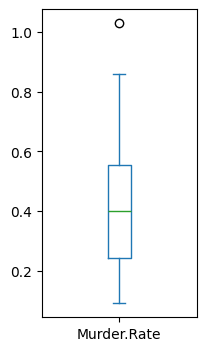

In [67]:
#Diagrama de caja(murder rate)
ax=(data["Murder.Rate"]/10).plot.box(figsize=(2,4))
ax.set_label("Tasa de asesinatos")

###Analisis:
En este gráfico, se observa que la mediana está ligeramente por debajo del centro, lo que indica una distribución ligeramente sesgada hacia la derecha. Esto nos da a entender que hay algunos valores más altos.

La caja representa el 50% central de los datos, es decir, desde el primer cuartil (Q1) hasta el tercer cuartil (Q3). La mayoría de las observaciones se concentran en valores bajos de tasa de asesinatos, aproximadamente entre 0.2 y 0.6.

Los bigotes del gráfico muestran el rango en el que se encuentran los datos que no son considerados atípicos. Sin embargo, se destaca un valor atípico por encima del bigote superior, representado por un círculo. Este punto indica que al menos una región presenta una tasa de asesinatos considerablemente más alta en comparación con el resto del conjunto de datos.

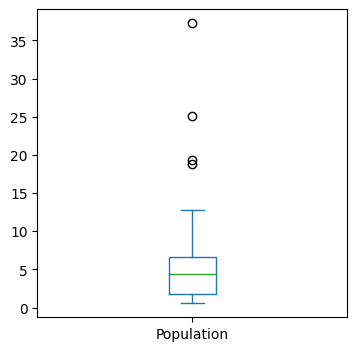

In [63]:
#Grafica de diagrama de caja
ax=(data.Population/1_000_000).plot.box(figsize=(4,4))
ax.set_label("Poblacion en millones")

###Analisis:
En el gráfico se puede observar que la mediana se encuentra cerca del centro del rango intercuartílico, lo que sugiere una distribución aproximadamente simétrica entre los valores centrales.

La caja del diagrama representa el 50% de los datos, es decir, los valores que se encuentran entre el primer cuartil (Q1) y el tercer cuartil (Q3). La mayoría de las poblaciones están concentradas en un rango que va aproximadamente desde 2 millones hasta 6 millones de habitantes.

Sin embargo, se destacan varios valores atípicos ubicados por encima del bigote superior. Estos puntos representan regiones o entidades con poblaciones considerablemente mayores que el resto. Entre ellos, hay poblaciones que superan los 20, 25 y hasta más de 35 millones de habitantes, lo cual indica una alta concentración poblacional en unos pocos casos excepcionales.

In [62]:
#Tabla de frecuencia e histograma (murder)
binnedPopulation=pd.cut(data["Murder.Rate"],10)
binnedPopulation.value_counts()

,count
Murder.Rate,
"(1.84, 2.78]",10
"(4.66, 5.6]",9
"(5.6, 6.54]",8
"(2.78, 3.72]",8
"(3.72, 4.66]",7
"(0.891, 1.84]",5
"(6.54, 7.48]",1
"(8.42, 9.36]",1
"(9.36, 10.3]",1


In [37]:
#Calculando la tabla de frecuencia  e histograma
binnedPopulation=pd.cut(data["Population"],10)
binnedPopulation.value_counts()

,count
Population,
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0


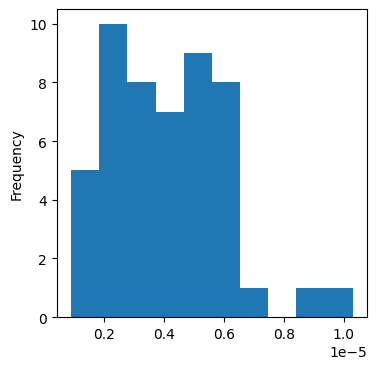

In [65]:
#Diagrama de frecuancia (tasa de asesinatos)
ax=(data["Murder.Rate"]/1_000_000).plot.hist(figsize=(4,4))
ax.set_label("Tasa de asesinatos")

###Analisis:
El histograma revela que la mayoría de las tasas de asesinato se concentran en los valores más bajos. El grupo más frecuente corresponde al primer intervalo, con aproximadamente 10 observaciones. A medida que los valores aumentan, la frecuencia disminuye, lo cual indica que las tasas altas de asesinato son menos comunes.

Este patrón sugiere una distribución sesgada hacia la derecha, también conocida como asimetría positiva. Es decir, la mayor parte de las regiones presentan tasas de asesinatos relativamente bajas, mientras que unas pocas tienen tasas notablemente más altas.

###

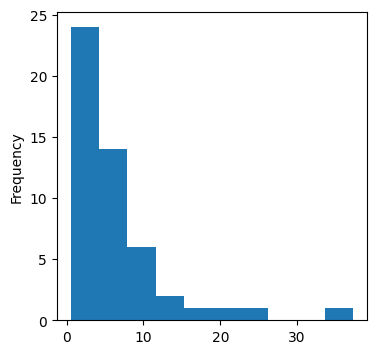

In [42]:
#Diagrama de frecuancia (poblacion)
ax=(data.Population/1_000_000).plot.hist(figsize=(4,4))
ax.set_label("Población en millones")

###Analisis:
Este gráfico muestra cuántas regiones tienen diferentes niveles de población, medidos en millones. Lo primero que salta a la vista es que la mayoría de las regiones tienen poblaciones pequeñas, especialmente entre 0 y 10 millones de personas. El primer grupo es el más frecuente, con más de 20 regiones dentro de ese rango.

A medida que la población aumenta, la cantidad de regiones disminuye rápidamente. Muy pocas regiones tienen más de 10 millones de habitantes, y casi ninguna supera los 30 millones. Esto nos dice que las regiones con muchísima gente son una excepción.


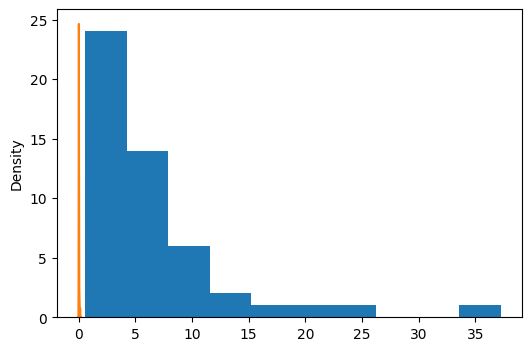

In [74]:
#Diagrama de dispercion (population)
ax=(data.Population/1_000_000).plot.hist(figsize=(6,4))
(data.Population/3_000_000_00).plot.density(ax=ax)
ax.set_label("Poblacion en millones")

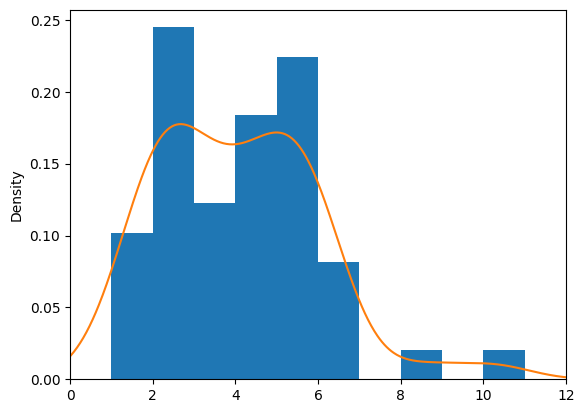

In [41]:
#Diagrama de dispercion
ax=data["Murder.Rate"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
data["Murder.Rate"].plot.density(ax=ax)
ax.set_label("Tasa de asesinatos por 1M de habitantes")

###Analisis:
Este gráfico muestra cómo se distribuyen las tasas de asesinatos por cada millón de habitantes. La barra azul representa la cantidad de lugares con tasas en diferentes rangos, y la línea naranja ayuda a ver la forma general de la distribución.

Se puede ver que la mayoría de los lugares tienen tasas entre 2 y 6 asesinatos por millón, con un pico alrededor de 3. Hay pocos lugares con tasas muy bajas o muy altas, y las tasas más altas (por encima de 8) son bastante raras.